# Да ли гојазност утиче на крвни притисак?
У овој лекцији ћемо се бавити једним од најчешћих параметара здравственог стања појединца - крвним притиском. Овога пута ћемо, поред демографских, кориситити и податке о физичком медицинском прегледу (*examination.csv*) и лековима које испитаници користе (*medications.csv*).

In [35]:
import pandas as pd

podaciDem = pd.read_csv('podaci/demographic.csv')
podaciMed = pd.read_csv('podaci/examination.csv')
podaciLek = pd.read_csv('podaci/medications.csv')

Изглед табеле *demographic.csv* погледали смо у првој лекцији. Погледајмо сада каква је структура друге две табеле.

In [36]:
podaciMed.head(5)

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


Табела *examination.csv* има чак 224 колоне. Ми ћемо се фокусирати на оне са префиксом BPX које се тичу мерења крвог притиска испитаника (енгл. *blood pressure*)

In [37]:
podaciLek.head(5)

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


Табела *medication.csv* има много мање колона. За нас су битне варијабле које говоре о томе од чега се лечи особа (RXRSD1), односно који лек пије (RXDDRUG).

Погледајмо најпре какве су дистрибуције систолног ("горњег") и дијастолног ("доњег") притиска. Употребићемо тзв. *виолински дијаграм* који је нека врста комбинације стубичастог и кутијастог дијаграма. На основу њега можемо да закључимо око којих вредности се групишу резултати и у којој мери су распршени. У описаном истраживању притисак је мерен четири пута. Приказали смо сва мерења како бисмо за даљу анализу одабрали оно које је најстабилније и у коме резултати најмање варирају, нпр. зато што су се испитаници после првог мерења мало опустили. 

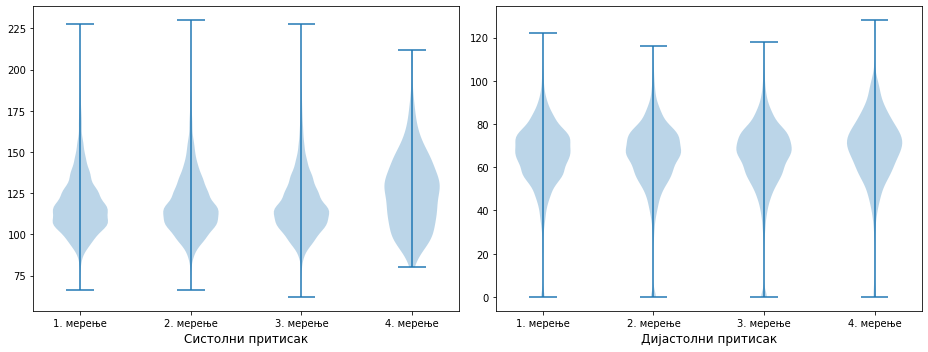

In [38]:
import matplotlib.pyplot as plt

# Направићемо засебне скупове за свако мерење "горнјег" крвног притиска
sis1 = podaciMed['BPXSY1'].dropna()
sis2 = podaciMed['BPXSY2'].dropna()
sis3 = podaciMed['BPXSY3'].dropna()
sis4 = podaciMed['BPXSY4'].dropna()

# Исто тако и за доњи
# При томе избацујемо редове у којима нема вредности командом dropna()
dis1 = podaciMed['BPXDI1'].dropna()
dis2 = podaciMed['BPXDI2'].dropna()
dis3 = podaciMed['BPXDI3'].dropna()
dis4 = podaciMed['BPXDI4'].dropna()

# Овде комбинујемо формиране скупове у листу скупова 
# Подаци морају тако да се припреме да бисмо исцртали виолински дијаграм
podSis = list([sis1, sis2, sis3, sis4])
podDis = list([dis1, dis2, dis3, dis4])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Подешавамо број подеока на x-оси на четири и дајемо им називе
xticklabels = ['1. мерење', '2. мерење', '3. мерење', '4. мерење']
ax1.set_xticks([1, 2, 3, 4])
ax1.set_xticklabels(xticklabels)
ax1.set_xlabel('Систолни притисак', fontsize=12)
# У левом пољу графикона исцртавамо вредности систолног притиска
ax1.violinplot(podSis)

ax2.set_xticks([1, 2, 3, 4])
ax2.set_xticklabels(xticklabels)
ax2.set_xlabel('Дијастолни притисак', fontsize=12)
# У десном пољу графикона исцртавамо вредности дијастолоног притиска
ax2.violinplot(podDis)

# Мало ћемо сабити простор између поља због прегледности
fig.tight_layout()

Изглед графикона показује да између прва три мерења нема битне разлике. Обратите пажњу да су дистрибуције систолног притиска искошене удесно, а дијастолног благо улево. Већина испитаника има нормалан "горњи" притисак (око 120) и нешто нижи "доњи" (мање од 80).  Обратите пажњу да, за разлику од кутијастог дијаграма, виолински дијаграм нема могућност приказивања аутлајера већ су они укључени у распон вертикалних дужи.  

Израчунајмо ипак и описне показатеље приказаних дистрибуција: број испитаника функцијом `len()`, аритметичку средину функцијом `mean()`, медијану функцијом `median()` и стандардну девијацију функцијом `std()`.

In [39]:
print("Систолни 3. мерење: N = ", len(sis3), ", M = ", sis3.mean().round(2), ", Mdn = ", sis3.median(), ", s = ", sis3.std().round(2))
print("Систолни 4. мерење: N = ", len(sis4), ", M = ", sis4.mean().round(2), ", Mdn = ", sis4.median(), ", s = ", sis4.std().round(2))
print("Дијастолни 3. мерење: N = ", len(dis3), ", M = ", dis3.mean().round(2), ", Mdn = ", dis3.median(), ", s = ", dis3.std().round(2))
print("Дијастолни 4. мерење: N = ", len(dis4), ", M = ", dis4.mean().round(2), ", Mdn = ", dis4.median(), ", s = ", dis4.std().round(2))

Систолни 3. мерење: N =  7408 , M =  118.0 , Mdn =  114.0 , s =  18.08
Систолни 4. мерење: N =  515 , M =  125.67 , Mdn =  126.0 , s =  22.61
Дијастолни 3. мерење: N =  7408 , M =  65.04 , Mdn =  68.0 , s =  16.23
Дијастолни 4. мерење: N =  515 , M =  69.01 , Mdn =  70.0 , s =  15.81


На основу горе приказаних описних показатеља видимо да је разлика која се јавља у четвртом мерењу последица мањег узорка, вероватно оних испитаника којима у претходна три мерења није добијена валидна мера. Због тога ћемо у даљим анализама корисити треће мерење.

У наредном кораку ћемо поделити испитанике у категорије на основу висине крвног притиска како бисмо анализирали учесталост благе или тешке хипертензије. За рад са низовима најбоље је употребити библиотеку `numpy`.

In [40]:
import numpy as np

# Избацујемо редове у којима су вредности пристиска сумњиво ниске
pritisak = podaciMed[(podaciMed['BPXDI3'] > 20) & (podaciMed['BPXSY3'] > 20)].copy()

# Дефинишемо границе нормалног, повишеног и високог пристиска
granice = [ (pritisak['BPXDI3'] < 80) & (pritisak['BPXSY3'] < 120), 
            (pritisak['BPXDI3'] < 80) & (pritisak['BPXSY3'] > 119) & (pritisak['BPXSY3'] < 130), 
            ((pritisak['BPXDI3'] > 79) | (pritisak['BPXSY3'] > 129)) 
          ]
kategorije = [1, 2, 3]

# Uz pomoć funkcije select() формирамо нову варијаблу са вредностима 1-3 за категорије висине пристиска
pritisak['nivo'] = np.select(granice, kategorije, default=np.nan)

# Приказаћемо пет редова табеле да бисте повезали висину притиска са категоријама које смо формирали
pritisak[['BPXSY3', 'BPXDI3', 'nivo']].head(5)

,BPXSY3,BPXDI3,nivo
0,102.0,74.0,1.0
1,156.0,42.0,3.0
2,146.0,80.0,3.0
3,104.0,38.0,1.0
4,142.0,86.0,3.0


Сада ћемо употребити *дијаграм распрешења* или *скатер дијаграм* (енгл. scatterplot) помоћу кога "распршујемо" испитанике у простору две димензије. Распоред тачкица у координатном сиситему нам истовремено показује и да ли постоји повезаност између систолног и дијастолног притиска. 

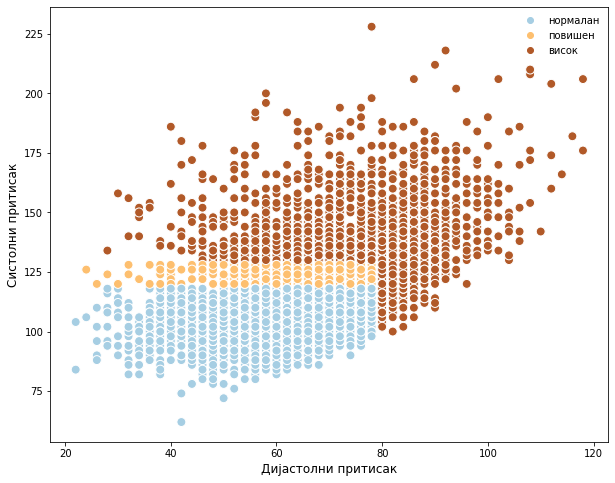

In [41]:
plt.figure(figsize=(10, 8))

# Дефинишемо x-осу, y-осу, боју тачкица (c) и палету боја која ће се користити (cmap)
skater = plt.scatter(x=pritisak['BPXDI3'], y=pritisak['BPXSY3'], c=pritisak['nivo'], edgecolors='white', s=80, cmap='Paired')
plt.xlabel('Дијастолни притисак', fontsize=12)
plt.ylabel('Систолни притисак', fontsize=12)

# Уз помоћ функције legend_elements() позивамо елементе легенде да бисмо им променили називе
plt.legend(handles=skater.legend_elements()[0], labels=['нормалан','повишен','висок'], frameon=False)
plt.show()

Свака тачкица на горњем дијаграму представља једног испитаника који има своје вредности на x- и y-оси. Недостатак тачкица у горњем левом и доњем десном квадранту показује да су "горњи" и "доњи" притисак повезани у смислу да особе које имају виши један, имају виши и други. Плаве тачкице представљају испитанике са нормалним притиском, мада треба обратити пажњу да је приликом дефинисанја ове категорије одређена само горња граница. То може да буде проблематично јер очигледно постоје особе којима је притисак превише низак. Такође обратите пажњу да је нормалан притисак дефинисам коришћенјем комбинације два услова. То значи да постоје особе које имају нпр. нормалан систолни пристисак, али су због повишеног дијастолног сврстани у смеђу групу.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Да ли је слика представљена скатер дијаграмом сагласна са претходно приказаним виолинским дијаграмом за треће мерење?<BR>Šta može da se vidi na prvom, a ne na drugom i obratno?</div> 

<details>    
<summary>
    Прикажи одговор
</summary>
На основу скатер дијаграма можемо да закључимо колики су распон варијабли као и на основу виолинског дијаграма. Међутим, с обзиром на то да више особа може да се нађе на истом месту, тј. да тачкице могу да буду наслагане једна на другу, теже је проценити где је највећа концентрација резултата.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Да ли је варијабилност систолног притиска већа у групи оних којима је он низак или у групи којима је висок?</div> 

<details>    
<summary>
    Прикажи одговор
</summary>
Посматрамо распршење тачкица дуж y-осе. Плави кружићи су манје распршени по вертикали од смеђих. Уочавамо да има доста испитаника који се могу сматрати аутлајерима јер су им вредности систолног притиска атипично високе. 

За већину испитаника у узорку доступни су подаци о томе које лекове користе. Поред назива лека, у скупу *medications.csv* наведен је и стандардизовани назив болести (RXDRSD1) према *Међународној класификацији болести* (engl. *ICD - International Classification of Diseases*). Погледаћемо најпре коју врсту терапије испитаници најчешће користе.

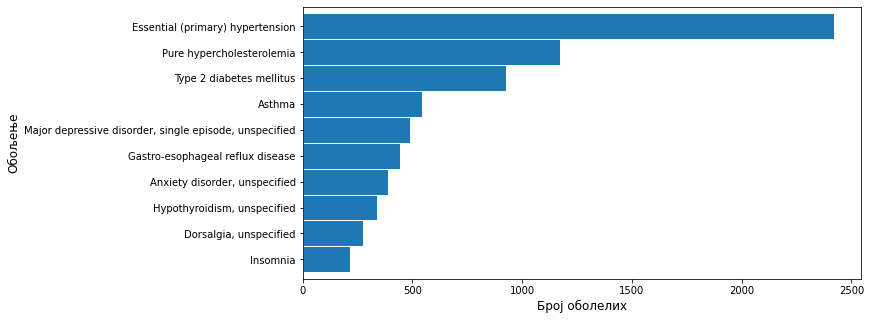

In [42]:
plt.figure(figsize=(10,5))

# Функцијом value_counts() пребројавамо колико се пута нека болест јавља на листи
# Функцијом head() узимамо десет најчешћих болести
# Пошто се стубићи нижу од дна навише, сортираћемо их да би надужи био на врху
# Параметар barh користимо да би стубичасти дијаграм био хоризонтално постављен
podaciLek['RXDRSD1'].value_counts().head(10).sort_values().plot(kind='barh', width=1, edgecolor='white') 

plt.xlabel('Број оболелих', fontsize=12)
plt.ylabel('Обољење', fontsize=12)
plt.show()

Управо је хипертензија најучесталији здарвтсвени проблем са којим се испитаници сусрећу. Након тога следе повишен холестерол, дијабетес и астма. Интересантно је да су међу честим здравственим проблемима који се третирају медикаментима и два психичка: депресија и анксиозност. 

Сада ћемо формирати нови скуп података који садржи јединствене идентификаторе испитаника (SEQN) и податак о томе да ли он или она користи лек за смањење високог крвног пристиска (енгл. *hypertension*). 

In [43]:
# Уз помоћ команде str.contains() издвајамо кодове испитаника (SEQN) код којих бваријабла RXDRSD1 садржи реч hypertension
# Параметром na=False нагалашавамо да не желимо празне ћелије
podaciLekPrit = podaciLek[podaciLek['RXDRSD1'].str.contains('hypertension', na=False)][['SEQN']]

# Вредност нове варијабле prit постављамо на 1 код свих испитаника
podaciLekPrit['prit'] = 1

# Спајамо код из основне табела podaciLek са кодовима из нове табеле podaciLekPrit
# Испитаници који постоје у првој, а не постоје у другој табели добиће вредност <NA> (not available)
# Њима ћемо командом fillna() доделити вредност 0 на варијабли prit јер они не пију лек за притисак
podaciPrit = pd.merge(podaciLek[['SEQN']].drop_duplicates(), podaciLekPrit, on='SEQN', how='left').fillna(0)

Повезаност или корелација која се графички најчешће приказује скатер дијаграмом, квантитатвно се исказује коефицијентима корелације. Израчунаћемо степен повезаност између индекса телесне масе испитаника и висине њиховог крвног притискa, а у зависноссти од пола и узимања терапије коју смо евидентирали у претходно направљеном скупу `podaciLekPrit`. Степен повезаности изражава се *коефицијентом корелације*. Вредност коефицијената корелације креће се од -1 до 1, при чему вредност блиска нули означава да појаве нису повезане. Да бисмо умањили вероватноћу добијанја лажно високих корлација, уклонићемо 1% екстремно високих резултата који се могу сматрати аберантним користећи функцију `quantile(0.99)`. 

In [44]:
# Спајамо податке о медицинском прегледу са демографским подацима
podaci = pd.merge(podaciMed[(podaciMed['BPXSY3'] < podaciMed['BPXSY3'].quantile(0.99)) 
    & (podaciMed['BMXBMI'] < podaciMed['BMXBMI'].quantile(0.99))], 
    podaciDem[podaciDem['RIDAGEYR'] > 0], on='SEQN')

# Након тога на исти начин новом скупу додајемо и колону prit из табеле podaciPrit
podaci = pd.merge(podaci, podaciPrit, on='SEQN')

# Рачунамо корелацију индекса телесне масе и висине крвног притиска
podaci[['BMXBMI', 'BPXSY3']].corr().round(2)


,BMXBMI,BPXSY3
BMXBMI,1.00,0.35
BPXSY3,0.35,1.00


У главној дијагонали горње *коелационе матрице* налазе се јединице јер варијабла корелира максимално сама са собом. Видимо да је повезаност између BMI и крвог притиска умерено висока и позитвна (r = 0.35), што значи да је већа вероватноћа да особе које имају прекомерну тежину имају и висок крвни притисак. У наредном кораку ћемо израчунати корелацију засебно за четири категорије испитаника формиране на основу пола и податка да ли особа узима антихипертензивну терапију или не.

Уочите да и овде правимо мрежу графикона, али "кућицама" нисмо давали засебне називе (ax1, ax2, ax3, ax4), већ смо их све сместили у један објекат `axis`. Тај објекат је дводимензионалан и има два реда и две колоне. То смо дефинисали командом `subplots(2, 2)`. Сваком елементу објекта приступамо преко броја реда и броја колоне. Тако је нпр. `axes[0][0]` горња лева "kućica", а `axes[1][1]` доња десна.  

Исту логику користимо и за приступање ћелијама корелационе матрице. Командом `iloc[0,1]` "лоцирамо" коефицијент који се налази у првом реду и другој колони. Обратите пажњу да нумерација увек почиње од нуле, тако да први ред или колона имају индекс 0.

На крају, треба напоменути да у статистици постоји пуно различитих коефицијената корелације. Најпопуларнији је *Пирсонов коефицијент корелације*, али њега не бисмо смели да применјујемо ако дистирбуције наших варијабли нису нормалне. Стога смо у овом примеру примениили *Спирманов коефицијент корлеације* задајући параметар `method='Spearman'`.

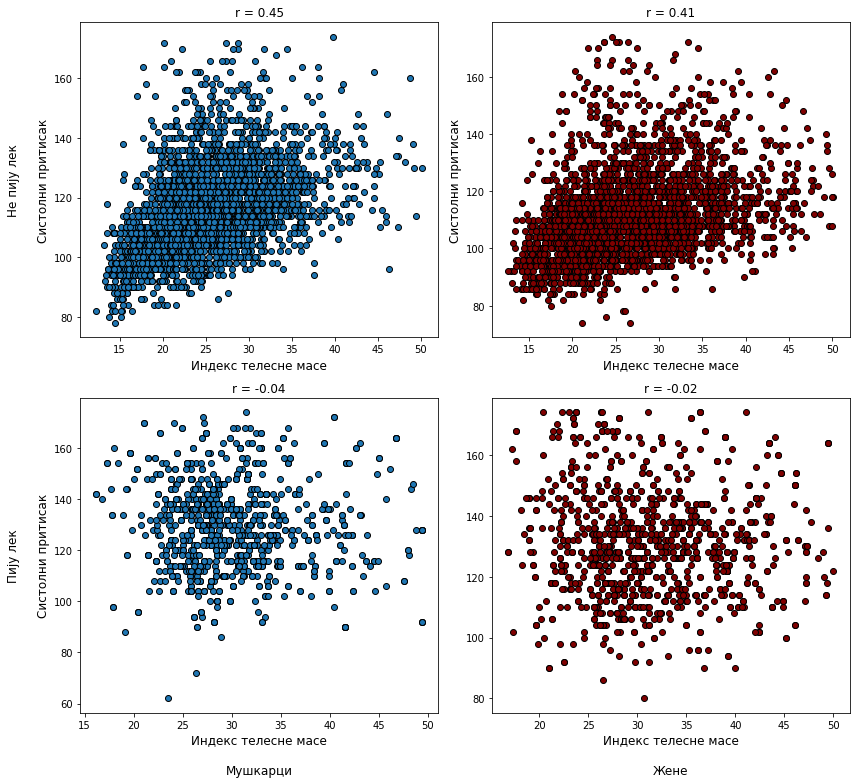

In [45]:
# Дефинишемо мрежу графикона 2 x 2 и величине 12 x 11 
fig, axes = plt.subplots(2, 2, figsize=(12,11))

# У прву кућицу уписујемо вредност другог коефицијента корлеације из корелационе матрице
# Вредност првог коефицијента је 1 јер је то повезаност варијабле BMXBMI саме са собом
priv = podaci[(podaci['RIAGENDR'] == 1) & (podaci['prit'] == 0)][['RIAGENDR', 'BMXBMI', 'BPXSY3']]
axes[0][0].scatter(priv['BMXBMI'], priv['BPXSY3'], edgecolor='black')
axes[0][0].set_title('r = ' + str(priv[['BMXBMI', 'BPXSY3']].corr(method='spearman').iloc[0,1].round(2)))
axes[0][0].set_ylabel('Не пију лек\n\nСистолни притисак', fontsize=12)
axes[0][0].set_xlabel('Индекс телесне масе', fontsize=12)

priv = podaci[(podaci['RIAGENDR'] == 2) & (podaci['prit'] == 0)][['RIAGENDR', 'BMXBMI', 'BPXSY3']]
axes[0][1].scatter(priv['BMXBMI'], priv['BPXSY3'], c='maroon', edgecolor='black')
# Назив графикона формирамо од израза "r =" на који се надовезује вредност коефицијента корелације
axes[0][1].set_title('r = ' + str(priv[['BMXBMI', 'BPXSY3']].corr(method='spearman').iloc[0,1].round(2)))
axes[0][1].set_ylabel('Систолни притисак', fontsize=12)
axes[0][1].set_xlabel('Индекс телесне масе', fontsize=12)

priv = podaci[(podaci['RIAGENDR'] == 1) & (podaci['prit'] == 1)][['RIAGENDR', 'BMXBMI', 'BPXSY3']]
axes[1][0].scatter(priv['BMXBMI'], priv['BPXSY3'], edgecolor='black')
axes[1][0].set_title('r = ' + str(priv[['BMXBMI', 'BPXSY3']].corr(method='spearman').iloc[0,1].round(2)))
# Постављамо називе x- и x-осе
axes[1][0].set_ylabel('Пију лек\n\nСистолни притисак', fontsize=12)
axes[1][0].set_xlabel('Индекс телесне масе\n\nМушкарци', fontsize=12)

priv = podaci[(podaci['RIAGENDR'] == 2) & (podaci['prit'] == 1)][['RIAGENDR', 'BMXBMI', 'BPXSY3']]
axes[1][1].scatter(priv['BMXBMI'], priv['BPXSY3'], c='maroon', edgecolor='black')
axes[1][1].set_title('r = ' + str(priv[['BMXBMI', 'BPXSY3']].corr(method='spearman').iloc[0,1].round(2)))
# На x-осу додајемо још један наслов (жене) који ће се односити и на графикон изнад
axes[1][1].set_xlabel('Индекс телесне масе\n\nЖене', fontsize=12)

fig.tight_layout()

Уочите да коефицијент корелације који је на целокупном узорку исносио 0.35 не важи за сваку од формираних категорија испитаника. Корелација између индекса телесне масе и притиска код мушкараца који не пију лекове за притисак је чак и виша (r = 0.45). Са друге стране, у групама испитаника, односно испитаница које узимају антихипертензиву терапију ова корелација је практично нулта. 

Одговор на питање из наслова ипак треба да буде одричан. Иако то звучи нелогично узимајући у обзир резултате већине медицинских студија, подаци које смо описали не пружају довољно потврде за такав закључак. Наравно, увек треба бити обазрив јер разлози неког неочекиваног закључка могу бити грешке у мерењу или специфичности узорка на коме је обавлјено истраживање. Нама је био циљ да илуструјемо одређени статистички поступак и да укажемо на кључну ствар везану за анализу повезности: чак и да је корелација коју смо рачунали много виша, то нам не даје за право да тежину посматрамо као *узрок* хипертензије. Статистичким речником речено, корелација не подразумева каузалност! Ту првенствено мислимо на податак да постоји доста особа које нису гојазне, а које имају веома висок крвни притисак. Коефицијент корелације нам говори само да се две појаве заједнички мењају, што не значи нужно да су једна другој узрок или последица. 

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Да ли је корелација телесне масе и пристиска у групи мушкараца који не пију лекове иста у свим деловима скатер дијаграма, тј. за све нивое телесне масе?</div> 

<details>    
<summary>
    Прикажи одговор
</summary>
Није. Распршеност је већа у зони високих вредности обе варијабле па је вероватно и корлација у тој зони мања. Ова различита распршеност тачкица дуж једне замишљене линије у статистици се зове <i>хетероскедастицитет</i>.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Одступање од начелне "правилности" да је тежина повезана са притиском није иста у сегменту особа које су теже и особа које имају веома висок притисак. Где је то одступање веће?</div> 

<details>    
<summary>
    Прикажи одговор
</summary>
Варијабилност тежине је већа у групи особа са високим притиском од варијабилности притиска у групи особа прекомерне тежине. Између осталог, то се најбоље види по томе што је доњи десни квадрант графикона прилично празан. То значи да нема пуно гојазних особа којима је притисак низак, али међу особама које имају висок притисак има и гојазних и готово неухрањених.